In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("worksheet3.ipynb")

# Worksheet 3: CRUD operations in MongoDB

Welcome! In this week, we will practice some basic CRUD (Create, Replace, Update, Delete) operations in MongoDB using Pymongo.

## Establish Pymongo connection

Recall that in worksheet1, we have created a cluster on MongoDB Atlas and connect to it via Pymongo and a credentials JSON file. Let's reestablish that connection for our exercises.

- Make sure you use the `adsc_3610` conda environment.
- You might need to copy & paste the `credentials_mongodb.json` file that you used in worksheet1 to the working directory of worksheet3.

In [131]:
from pymongo import MongoClient # import mongo client to connect
import json # import json to load credentials
import urllib.parse

# load credentials from json file
with open('credentials_mongodb.json') as f:
    login = json.load(f)

# assign credentials to variables
username = login['username']
password = urllib.parse.quote(login['password'])
host = login['host']
url = "mongodb+srv://{}:{}@{}/?retryWrites=true&w=majority".format(username, password, host)

In [132]:
# connect to the database
client = MongoClient(url)

In [133]:
# drop database books and students if they exist
client.drop_database('books')
client.drop_database('students')

To test if your connection has been succesful, let's try to print out all the databases

In [134]:
# list all databases
client.list_database_names()

['bookstore',
 'sample_airbnb',
 'sample_analytics',
 'sample_geospatial',
 'sample_guides',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'school',
 'admin',
 'local']

## MongoDB VScode extension (optional)

If you are using VScode, there is a MongoDB extension which provides a handy view of the databases (instead of having to view it on MongoDB Atlas via a browser).

To install the extension, navigate to the extension bar in VS code and search for "mongodb"

![](img/vscode.png)

After installing the extension, you can now connect to your MongoDB Atlas cluster via the connection string.

![](img/connect.png)

To find your connection string, open a browser and navigate to MongoDB Atlas. 
- Under your cluster, click `connect`
- Select `MongoDB for VScode`
- Copy that URL and paste it in VScode

![](img/string.png)

Once connected, you should now be able to see an overview of your databases. Now you can manage your MongoDB and do programming all within VSCode. 

Now that we have establish the connection to our MongoDB cluster, let's get started with the exercises:

## Exercise 1: Import data into MongoDB

{rubric: accuracy = 5}

Let's first create a new database called `school` and store it in an object named `db`. We then create a new collection called `students`

In [135]:
# Step 1: Connect to your MongoDB cluster
client = MongoClient(url)

# Step 2: Create a new database named 'school' and store it in a variable named db
db = client.school

# Step 3: Create a collection named 'students' and insert sample documents
students = db.students

Let's insert a sample student document to our `students` collection

In [136]:
# Sample document to insert
sample_students = [{"name": "Alice", "age": 20, "major": "Computer Science"},
            {"name": "Bob", "age": 21, "major": "Mathematics"},
            {"name": "Charlie", "age": 22, "major": "Engineering"}]

# Insert the sample document
students.insert_many(sample_students)

InsertManyResult([ObjectId('66e8970fc48457d8d5b12655'), ObjectId('66e8970fc48457d8d5b12656'), ObjectId('66e8970fc48457d8d5b12657')], acknowledged=True)

You should see that the document has been inserted into our `students` collection, and it was assigned an `ObjectId`. 

> Note: Every document in MongoDB must have an `ObjectId`. If it doesn't exist, then MongoDB will create a new one automatically

Now we can print out the documents that we just inserted

In [137]:
# Find the document that was just inserted
# The find_one() method returns the first occurrence in the selection.
students.find_one()

{'_id': ObjectId('66e8885dc48457d8d5b1262c'),
 'name': 'Alice',
 'age': 20,
 'major': 'Computer Science',
 'gpa': None}

In [138]:
# Find the document by a specific attribute
students.find_one({"name": "Bob"})

{'_id': ObjectId('66e8885dc48457d8d5b1262d'),
 'name': 'Bob',
 'age': 21,
 'major': 'Mathematics',
 'gpa': None}

In [139]:
# Find all documents in the collection
# The find() method returns all occurrences in the selection.
for student in students.find():
    print(student)

{'_id': ObjectId('66e8885dc48457d8d5b1262c'), 'name': 'Alice', 'age': 20, 'major': 'Computer Science', 'gpa': None}
{'_id': ObjectId('66e8885dc48457d8d5b1262d'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12631'), 'name': 'Charlie Brown', 'age': 20, 'major': 'Physics', 'email': 'charlie.brown@example.com', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12632'), 'name': 'Diana Prince', 'age': 21, 'major': 'History', 'email': 'diana.prince@example.com', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12636'), 'name': 'Hank Pym', 'age': 21, 'major': 'Biochemistry', 'email': 'hank.pym@example.com', 'gpa': None}
{'_id': ObjectId('66e8970fc48457d8d5b12655'), 'name': 'Alice', 'age': 20, 'major': 'Computer Science'}
{'_id': ObjectId('66e8970fc48457d8d5b12656'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics'}
{'_id': ObjectId('66e8970fc48457d8d5b12657'), 'name': 'Charlie', 'age': 22, 'major': 'Engineering'}


Now if you navigate to your databases in MongoDB Atlas, or using the VSCode MongoDB extension, you should see there's a new database called `school`. Within that database, there should be a collection named `students`, which contains one document about Alice

In [140]:
# Try to find all documents where age is greater than 20
for student in students.find({"age": {"$gt": 20}}):
    print(student)

{'_id': ObjectId('66e8885dc48457d8d5b1262d'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12632'), 'name': 'Diana Prince', 'age': 21, 'major': 'History', 'email': 'diana.prince@example.com', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12636'), 'name': 'Hank Pym', 'age': 21, 'major': 'Biochemistry', 'email': 'hank.pym@example.com', 'gpa': None}
{'_id': ObjectId('66e8970fc48457d8d5b12656'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics'}
{'_id': ObjectId('66e8970fc48457d8d5b12657'), 'name': 'Charlie', 'age': 22, 'major': 'Engineering'}


### YOUR TURN

### 1.1

- Create a new database called `bookstore`, stored it in a variable called `bookstore`
- Create a collection called `books`, stored it in a variable called `books`

In [141]:
# Create a new database called `bookstore`, stored it in a variable called `bookstore`
# YOUR CODE HERE
bookstore = client.bookstore # SOLUTION

# Create a collection called `books` 
# YOUR CODE HERE
books = bookstore.books # SOLUTION

Insert the following sample documents in `sample_books` into the `books` collection

In [142]:
sample_books = [
    {"title": "The Great Gatsby", "author": "F. Scott Fitzgerald", "genre": "Fiction", "price": 10.99},
    {"title": "To Kill a Mockingbird", "author": "Harper Lee", "genre": "Fiction", "price": 8.99},
    {"title": "A Brief History of Time", "author": "Stephen Hawking", "genre": "Non-Fiction", "price": 15.99}
]

# YOUR CODE HERE

# BEGIN SOLUTION
# Insert the sample_books into the books collection
books.insert_many(sample_books)
# END SOLUTION

InsertManyResult([ObjectId('66e8970fc48457d8d5b12658'), ObjectId('66e8970fc48457d8d5b12659'), ObjectId('66e8970fc48457d8d5b1265a')], acknowledged=True)

Print out a book with author as Stephen Hawking

In [143]:
# Print out a book with author as Stephen Hawking
# YOUR CODE HERE
books.find_one({"author": "Stephen Hawking"}) # SOLUTION

{'_id': ObjectId('66e8970fc48457d8d5b1265a'),
 'title': 'A Brief History of Time',
 'author': 'Stephen Hawking',
 'genre': 'Non-Fiction',
 'price': 15.99}

In [144]:
# Print out all books with price less than $10
# YOUR CODE HERE
for book in books.find({"price": {"$lt": 10}}): # SOLUTION
    print(book) # SOLUTION

{'_id': ObjectId('66e89549c48457d8d5b1264a'), 'title': '1984', 'author': 'George Orwell', 'published_year': 1949, 'isbn': '978-0-452-28423-4', 'price': 8.99, 'publisher': 'Unknown'}
{'_id': ObjectId('66e89549c48457d8d5b12651'), 'title': 'Fahrenheit 451', 'author': 'Ray Bradbury', 'published_year': 1953, 'isbn': '978-0-7432-4722-2', 'price': 9.49, 'publisher': 'Penguin Books'}
{'_id': ObjectId('66e89549c48457d8d5b12652'), 'title': 'Jane Eyre', 'author': 'Charlotte Brontë', 'published_year': 1847, 'isbn': '978-0-14-243720-9', 'price': 8.49, 'publisher': 'Unknown'}
{'_id': ObjectId('66e8970fc48457d8d5b12659'), 'title': 'To Kill a Mockingbird', 'author': 'Harper Lee', 'genre': 'Fiction', 'price': 8.99}


Run the test below to see if you have done it correctly

In [ ]:
grader.check("ex1_1")

### 1.2 Import from JSON

Imagine we have a dataset called `students.json` and we would like to import it into the `students` collection in our MongoDB database.

In [148]:
import json

# Step 1: Load JSON data
with open('students.json', 'r') as file:
    data = json.load(file)


In [149]:
# view what the data looks like (first 5 records)
data[:5]

[{'name': 'Alice Johnson',
  'age': 22,
  'major': 'Computer Science',
  'email': 'alice.johnson@example.com'},
 {'name': 'Bob Smith',
  'age': 24,
  'major': 'Mathematics',
  'email': 'bob.smith@example.com'},
 {'name': 'Charlie Brown',
  'age': 20,
  'major': 'Physics',
  'email': 'charlie.brown@example.com'},
 {'name': 'Diana Prince',
  'age': 21,
  'major': 'History',
  'email': 'diana.prince@example.com'},
 {'name': 'Eve Adams',
  'age': 23,
  'major': 'Biology',
  'email': 'eve.adams@example.com'}]

In [150]:

# Step 2: Insert JSON data into a collection
students.insert_many(data)  # For a list of documents


InsertManyResult([ObjectId('66e89710c48457d8d5b1265b'), ObjectId('66e89710c48457d8d5b1265c'), ObjectId('66e89710c48457d8d5b1265d'), ObjectId('66e89710c48457d8d5b1265e'), ObjectId('66e89710c48457d8d5b1265f'), ObjectId('66e89710c48457d8d5b12660'), ObjectId('66e89710c48457d8d5b12661'), ObjectId('66e89710c48457d8d5b12662'), ObjectId('66e89710c48457d8d5b12663'), ObjectId('66e89710c48457d8d5b12664')], acknowledged=True)

In [151]:
# Find all documents in the collection
# The find() method returns all occurrences in the selection.
for student in students.find():
    print(student)

{'_id': ObjectId('66e8885dc48457d8d5b1262c'), 'name': 'Alice', 'age': 20, 'major': 'Computer Science', 'gpa': None}
{'_id': ObjectId('66e8885dc48457d8d5b1262d'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12631'), 'name': 'Charlie Brown', 'age': 20, 'major': 'Physics', 'email': 'charlie.brown@example.com', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12632'), 'name': 'Diana Prince', 'age': 21, 'major': 'History', 'email': 'diana.prince@example.com', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12636'), 'name': 'Hank Pym', 'age': 21, 'major': 'Biochemistry', 'email': 'hank.pym@example.com', 'gpa': None}
{'_id': ObjectId('66e8970fc48457d8d5b12655'), 'name': 'Alice', 'age': 20, 'major': 'Computer Science'}
{'_id': ObjectId('66e8970fc48457d8d5b12656'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics'}
{'_id': ObjectId('66e8970fc48457d8d5b12657'), 'name': 'Charlie', 'age': 22, 'major': 'Engineering'}
{'_id': ObjectId('66e897

Now it's your turn, import the `books.json` into the `books` collection in the `bookstore` database in your MongoDB.

In [152]:
# BEGIN SOLUTION
with open('books.json', 'r') as file:
    data = json.load(file)

books.insert_many(data)  # For a list of documents

# END SOLUTION

InsertManyResult([ObjectId('66e89710c48457d8d5b12665'), ObjectId('66e89710c48457d8d5b12666'), ObjectId('66e89710c48457d8d5b12667'), ObjectId('66e89710c48457d8d5b12668'), ObjectId('66e89710c48457d8d5b12669'), ObjectId('66e89710c48457d8d5b1266a'), ObjectId('66e89710c48457d8d5b1266b'), ObjectId('66e89710c48457d8d5b1266c'), ObjectId('66e89710c48457d8d5b1266d'), ObjectId('66e89710c48457d8d5b1266e')], acknowledged=True)

In [ ]:
grader.check("ex1_2")

## Exercise 2: Insert & update new field

Let's say we want to add a field called `gpa` to the `students` collection. Here's how

In [155]:
# Step 1: Define the new field and its value
new_field = {"gpa": None}

# Step 2: Update all documents to include the new field
students.update_many({}, {"$set": new_field})

UpdateResult({'n': 18, 'electionId': ObjectId('7fffffff00000000000000cb'), 'opTime': {'ts': Timestamp(1726519056, 35), 't': 203}, 'nModified': 13, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1726519056, 35), 'signature': {'hash': b'\xa0X\xdd\x0f\xde\x96\xe2\xf6\x19j\x9e\xe4\xe8ab\x18\r]\xd2J', 'keyId': 7381891571605569538}}, 'operationTime': Timestamp(1726519056, 35), 'updatedExisting': True}, acknowledged=True)

In [156]:
# check if the new field was added
for student in students.find():
    print(student)

{'_id': ObjectId('66e8885dc48457d8d5b1262c'), 'name': 'Alice', 'age': 20, 'major': 'Computer Science', 'gpa': None}
{'_id': ObjectId('66e8885dc48457d8d5b1262d'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12631'), 'name': 'Charlie Brown', 'age': 20, 'major': 'Physics', 'email': 'charlie.brown@example.com', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12632'), 'name': 'Diana Prince', 'age': 21, 'major': 'History', 'email': 'diana.prince@example.com', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12636'), 'name': 'Hank Pym', 'age': 21, 'major': 'Biochemistry', 'email': 'hank.pym@example.com', 'gpa': None}
{'_id': ObjectId('66e8970fc48457d8d5b12655'), 'name': 'Alice', 'age': 20, 'major': 'Computer Science', 'gpa': None}
{'_id': ObjectId('66e8970fc48457d8d5b12656'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics', 'gpa': None}
{'_id': ObjectId('66e8970fc48457d8d5b12657'), 'name': 'Charlie', 'age': 22, 'major': 'Engineering'

Let's try to update the `gpa` of Jack Daniels to 3.4

In [157]:
# Step 2: Define the filter and the new value
filter = {"name": "Jack Daniels"}
new_value = {"$set": {"gpa": 3.4}}

# Step 3: Update the specific document
students.update_one(filter, new_value)

UpdateResult({'n': 1, 'electionId': ObjectId('7fffffff00000000000000cb'), 'opTime': {'ts': Timestamp(1726519056, 37), 't': 203}, 'nModified': 1, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1726519056, 37), 'signature': {'hash': b'\xa0X\xdd\x0f\xde\x96\xe2\xf6\x19j\x9e\xe4\xe8ab\x18\r]\xd2J', 'keyId': 7381891571605569538}}, 'operationTime': Timestamp(1726519056, 37), 'updatedExisting': True}, acknowledged=True)

In [158]:
# check Jack Daniels GPA
students.find_one({"name": "Jack Daniels"})



{'_id': ObjectId('66e89710c48457d8d5b12664'),
 'name': 'Jack Daniels',
 'age': 22,
 'major': 'Business',
 'email': 'jack.daniels@example.com',
 'gpa': 3.4}

Now it's your turn. 
- Insert a field called `"publisher"` into the `books` collection with a default value of `"Unknown"`. 
- Update the `publisher` of the book with the author name is "Ray Bradbury", to "Penguin Books"

In [159]:
# BEGIN SOLUTION
books.update_many({}, {"$set": {"publisher": "Unknown"}})
books.update_one({"author": "Ray Bradbury"}, {"$set": {"publisher": "Penguin Books"}})
# END SOLUTION

UpdateResult({'n': 1, 'electionId': ObjectId('7fffffff00000000000000cb'), 'opTime': {'ts': Timestamp(1726519056, 54), 't': 203}, 'nModified': 1, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1726519056, 54), 'signature': {'hash': b'\xa0X\xdd\x0f\xde\x96\xe2\xf6\x19j\x9e\xe4\xe8ab\x18\r]\xd2J', 'keyId': 7381891571605569538}}, 'operationTime': Timestamp(1726519056, 54), 'updatedExisting': True}, acknowledged=True)

In [160]:
# print out the document by Ray Bradbury

In [ ]:
grader.check("ex2")

## Exercise 3: Replace

Let's print out our student Jack Daniels

In [162]:
students.find_one({"name": "Jack Daniels"})

{'_id': ObjectId('66e89710c48457d8d5b12664'),
 'name': 'Jack Daniels',
 'age': 22,
 'major': 'Business',
 'email': 'jack.daniels@example.com',
 'gpa': 3.4}

Let's say we want to replace the entire document by a new one. Let's called this `new_student`

In [163]:
new_student = {
    "name": "John Doe", 
    "age": 25, 
    "major": "History", 
    "email": "john_doe@gmail.com",
    "gpa": 3.1
}

students.replace_one({"name": "Jack Daniels"}, new_student)

# check if Jack Daniels was replaced
students.find_one({"name": "Jack Daniels"})


In [164]:
students.find_one({"name": "John Doe"})


{'_id': ObjectId('66e89710c48457d8d5b12664'),
 'name': 'John Doe',
 'age': 25,
 'major': 'History',
 'email': 'john_doe@gmail.com',
 'gpa': 3.1}

Now it's your turn.

Replace the book by Stephen Hawking with the `new_book`

In [165]:
new_book = {
    "title": "The Universe in a Nutshell",
    "author": "Stephen Hawking",
    "genre": "Non-Fiction",
    "price": 12.99,
    "publisher": "Bantam Books"
}

# YOUR CODE HERE
books.replace_one({"author": "Stephen Hawking"}, new_book) # SOLUTION


UpdateResult({'n': 1, 'electionId': ObjectId('7fffffff00000000000000cb'), 'opTime': {'ts': Timestamp(1726519056, 58), 't': 203}, 'nModified': 1, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1726519056, 58), 'signature': {'hash': b'\xa0X\xdd\x0f\xde\x96\xe2\xf6\x19j\x9e\xe4\xe8ab\x18\r]\xd2J', 'keyId': 7381891571605569538}}, 'operationTime': Timestamp(1726519056, 58), 'updatedExisting': True}, acknowledged=True)

In [166]:
# print out the document by Stephen Hawking
books.find_one({"author": "Stephen Hawking"}) # SOLUTION

{'_id': ObjectId('66e8970fc48457d8d5b1265a'),
 'title': 'The Universe in a Nutshell',
 'author': 'Stephen Hawking',
 'genre': 'Non-Fiction',
 'price': 12.99,
 'publisher': 'Bantam Books'}

In [ ]:
grader.check("ex3")

## Exercise 4: Delete


Let's say I want to delete all documents in the `students` collection where their `age` is above 21

In [168]:
# Step 1: Define the filter to find the documents to be deleted
filter = {"age": {"$gt": 21}}

# Step 2: Delete the documents
result = students.delete_many(filter)

# Step 3: Print the number of documents deleted
print(result.deleted_count, " documents deleted.")

# check if the documents were deleted
for student in students.find():
    print(student)

8  documents deleted.
{'_id': ObjectId('66e8885dc48457d8d5b1262c'), 'name': 'Alice', 'age': 20, 'major': 'Computer Science', 'gpa': None}
{'_id': ObjectId('66e8885dc48457d8d5b1262d'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12631'), 'name': 'Charlie Brown', 'age': 20, 'major': 'Physics', 'email': 'charlie.brown@example.com', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12632'), 'name': 'Diana Prince', 'age': 21, 'major': 'History', 'email': 'diana.prince@example.com', 'gpa': None}
{'_id': ObjectId('66e88869c48457d8d5b12636'), 'name': 'Hank Pym', 'age': 21, 'major': 'Biochemistry', 'email': 'hank.pym@example.com', 'gpa': None}
{'_id': ObjectId('66e8970fc48457d8d5b12655'), 'name': 'Alice', 'age': 20, 'major': 'Computer Science', 'gpa': None}
{'_id': ObjectId('66e8970fc48457d8d5b12656'), 'name': 'Bob', 'age': 21, 'major': 'Mathematics', 'gpa': None}
{'_id': ObjectId('66e89710c48457d8d5b1265d'), 'name': 'Charlie Brown', 'age'

Now it's your turn.

Delete all the documents in the `books` collection where the `title` start with letter "T" 

> Hint: You can use regex expression in the filter. For example, if I want all students start with letter "M", I would use 
> 
> `filter = {"name": {"$regex": "^M"}}`

In [169]:
# Delete all the documents in the `books` collection where the `title` start with letter "T"
# YOUR CODE HERE
# BEGIN SOLUTION
filter = {"title": {"$regex": "^T"}} 
result = books.delete_many(filter) 
# END SOLUTION


In [170]:
# Print the number of documents deleted
print(result.deleted_count, " documents deleted.") # SOLUTION

7  documents deleted.


In [171]:
# check if the documents were deleted
# find all books that start with letter "T"
for book in books.find({"title": {"$regex": "^T"}}): # SOLUTION
    print(book) # SOLUTION

In [172]:
# print all the documents in the collection
for book in books.find():   # SOLUTION
    print(book) # SOLUTION

{'_id': ObjectId('66e89549c48457d8d5b1264a'), 'title': '1984', 'author': 'George Orwell', 'published_year': 1949, 'isbn': '978-0-452-28423-4', 'price': 8.99, 'publisher': 'Unknown'}
{'_id': ObjectId('66e89549c48457d8d5b1264b'), 'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'published_year': 1813, 'isbn': '978-0-19-953556-9', 'price': 12.99, 'publisher': 'Unknown'}
{'_id': ObjectId('66e89549c48457d8d5b1264d'), 'title': 'Moby-Dick', 'author': 'Herman Melville', 'published_year': 1851, 'isbn': '978-0-14-243724-7', 'price': 11.99, 'publisher': 'Unknown'}
{'_id': ObjectId('66e89549c48457d8d5b1264e'), 'title': 'War and Peace', 'author': 'Leo Tolstoy', 'published_year': 1869, 'isbn': '978-0-14-044793-4', 'price': 14.99, 'publisher': 'Unknown'}
{'_id': ObjectId('66e89549c48457d8d5b12651'), 'title': 'Fahrenheit 451', 'author': 'Ray Bradbury', 'published_year': 1953, 'isbn': '978-0-7432-4722-2', 'price': 9.49, 'publisher': 'Penguin Books'}
{'_id': ObjectId('66e89549c48457d8d5b12652'),

In [ ]:
grader.check("ex4")

## Exercise 5: Visualize

Let's say that we are retriving students data and we want to convert the results to pandas DataFrame

In [173]:
import pandas as pd
# Step 2: Query all documents in the collection
cursor = students.find()

# Step 3: Convert the cursor to a list and then to a DataFrame
students_data = list(cursor)
df = pd.DataFrame(students_data)

# Print the DataFrame to verify
df.head()

,_id,name,age,major,gpa,email
0,66e8885dc48457d8d5b1262c,Alice,20,Computer Science,None,NaN
1,66e8885dc48457d8d5b1262d,Bob,21,Mathematics,None,NaN
2,66e88869c48457d8d5b12631,Charlie Brown,20,Physics,None,charlie.brown@example.com
3,66e88869c48457d8d5b12632,Diana Prince,21,History,None,diana.prince@example.com
4,66e88869c48457d8d5b12636,Hank Pym,21,Biochemistry,None,hank.pym@example.com


Now let's create a simple bar chart of students' age

<Axes: title={'center': 'Age Distribution of Students'}, ylabel='Frequency'>

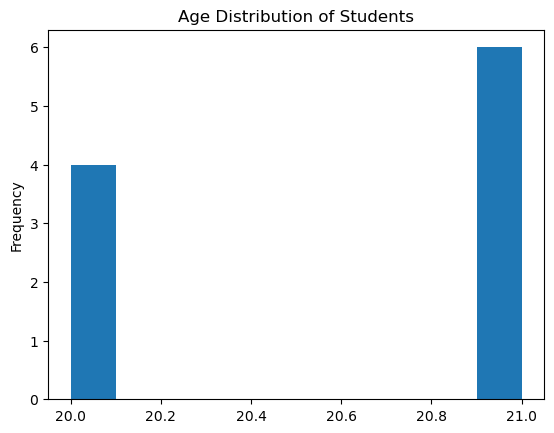

In [174]:
# create a histogram of students age
df['age'].plot(kind='hist', title='Age Distribution of Students')

Now it's your turn

- Convert the `books` collection into a pd.Dataframe called `df_books`
- Create a histogram of books' prices

In [175]:
# Convert the `books` collection into a pd.Dataframe called `df_books`
# YOUR CODE HERE
# BEGIN SOLUTION
cursor = books.find()
books_data = list(cursor)
df_books = pd.DataFrame(books_data)
df_books
# END SOLUTION

,_id,title,author,published_year,isbn,price,publisher
0,66e89549c48457d8d5b1264a,1984,George Orwell,1949,978-0-452-28423-4,8.99,Unknown
1,66e89549c48457d8d5b1264b,Pride and Prejudice,Jane Austen,1813,978-0-19-953556-9,12.99,Unknown
2,66e89549c48457d8d5b1264d,Moby-Dick,Herman Melville,1851,978-0-14-243724-7,11.99,Unknown
3,66e89549c48457d8d5b1264e,War and Peace,Leo Tolstoy,1869,978-0-14-044793-4,14.99,Unknown
4,66e89549c48457d8d5b12651,Fahrenheit 451,Ray Bradbury,1953,978-0-7432-4722-2,9.49,Penguin Books
5,66e89549c48457d8d5b12652,Jane Eyre,Charlotte Brontë,1847,978-0-14-243720-9,8.49,Unknown
6,66e89710c48457d8d5b12666,1984,George Orwell,1949,978-0-452-28423-4,8.99,Unknown
7,66e89710c48457d8d5b12667,Pride and Prejudice,Jane Austen,1813,978-0-19-953556-9,12.99,Unknown
8,66e89710c48457d8d5b12669,Moby-Dick,Herman Melville,1851,978-0-14-243724-7,11.99,Unknown
9,66e89710c48457d8d5b1266a,War and Peace,Leo Tolstoy,1869,978-0-14-044793-4,14.99,Unknown


<Axes: title={'center': 'Price Distribution of Books'}, ylabel='Frequency'>

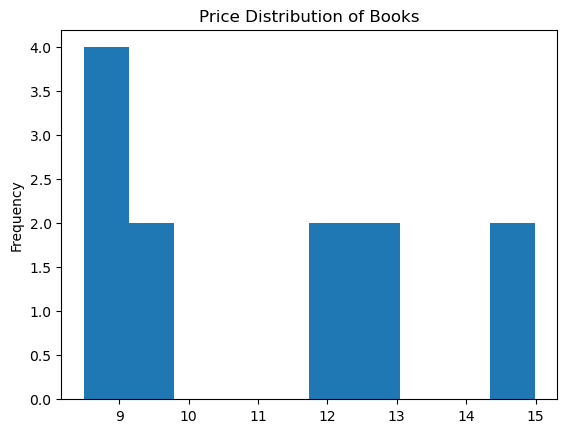

In [176]:
# visualize the distribution of book prices
df_books['price'].plot(kind='hist', title='Price Distribution of Books') # SOLUTION

In [ ]:
grader.check("ex5")

## Submission instructions

{rubric: mechanics = 5}

- Make sure the notebook can run from top to bottom without any error. Restart the kernel and run all cells.
- Commit and push your notebook to the github repo
- Double check your notebook is rendered properly on Github and you can see all the outputs clearly